In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h1>Figure 3</h1>
<h2>Gene replacement assays</h2>
<p>As a diagnostic test for identifying mRNAs controlled by decoding speed, pairs of natural and codon-optimised genes were compared for protein expression levels (the assumption being that if decoding speed is limiting, improving codon usage and deocding pseed should reaulst in increased protein expression levles).</p>
<p>The following genes were used (given with transcription start and stop sites used to generate the transcript sequences for these genes):</p>
<table>
    <tr>
        <th>Gene</th>
        <th>ORF</th>
        <th>5'-UTR start</th>
        <th>3'-UTR end</th>
    </tr>
    <tr>
        <td><a href="https://www.yeastgenome.org/locus/S000005654" target=_blank></a><i>ADE2</i></td>
        <td>YOR128C</td>
        <td>-39</td>
        <td>+55</td>
    </tr>
    <tr>
        <td><a href="https://www.yeastgenome.org/locus/S000000595" target=_blank></a><i>CDC10</i></td>
        <td>YCR002C</td>
        <td>-45</td>
        <td>+40</td>
    </tr>
    <tr>
        <td><a href="https://www.yeastgenome.org/locus/S000005980" target=_blank></a><i>GRX5</i></td>
        <td>YPL059W</td>
        <td>-62</td>
        <td>+137</td>
    </tr>
    <tr>
        <td><a href="https://www.yeastgenome.org/locus/S000005728" target=_blank></a><i>HIS3</i></td>
        <td>YOR202W</td>
        <td>-10</td>
        <td>+82</td>
    </tr>
    <tr>
        <td><a href="https://www.yeastgenome.org/locus/S000003059" target=_blank></a><i>NBP35</i></td>
        <td>YGL091C</td>
        <td>-80</td>
        <td>+136</td>
    </tr>
    <tr>
        <td><a href="https://www.yeastgenome.org/locus/S000005042" target=_blank></a><i>RAS2</i></td>
        <td>YNL098C</td>
        <td>-236</td>
        <td>+97</td>
    </tr>
    <tr>
        <td><a href="https://www.yeastgenome.org/locus/S000002579" target=_blank></a><i>SUP35</i></td>
        <td>YDR172W</td>
        <td>-53</td>
        <td>+178</td>
    </tr>
</table>
<p>The otimised and non-optimised transcript sequences are given in file <a href="ReplacedGenes.fasta" target=_blank>ReplacedGenes.fasta</a>. Lower case parts of the sequences identify the codon optimised ORFs.</p>

<h2>RNA stability differences</h2>
<p>All sequences were analysed via the <a href="http://rna.tbi.univie.ac.at/cgi-bin/RNAWebSuite/RNAfold.cgi" target=_blank>RNAfold web server</a>. </p>
<table>
    <tr>
        <th>Gene</th>
        <th>Minimum Free Energy wt gene</th>
        <th>Minimum Free Energy opt gene</th>
        <th>Ensemble energy wt gene</th>
        <th>Ensemble energy opt gene</th>
    </tr>
    <tr>
        <td><i>ADE2</i></td>
        <td>-436.50</td>
        <td>-513.80</td>
        <td>-470.95</td>
        <td>-547.88</td>
    </tr>
    <tr>
        <td><i>CDC10</i></td>
        <td>-219.10</td>
        <td>-233.10</td>
        <td>-241.74</td>
        <td>-252.97</td>
    </tr>
    <tr>
        <td><i>GRX5</i></td>
        <td>-143.00</td>
        <td>-155.90</td>
        <td>-157.35</td>
        <td>-168.43</td>
    </tr>
    <tr>
        <td><i>HIS3</i></td>
        <td>-223.00</td>
        <td>-220.90</td>
        <td>-236.63</td>
        <td>-184.27</td>
    </tr>
    <tr>
        <td><i>NBP35</i></td>
        <td>-309.17</td>
        <td>-354.70</td>
        <td>-332.86</td>
        <td>-380.01</td>
    </tr>
    <tr>
        <td><i>RAS2</i></td>
        <td>-309.70</td>
        <td>-309.40</td>
        <td>-332.94</td>
        <td>-331.65</td>
    </tr>
    <tr>
        <td><i>SUP35</i></td>
        <td>-539.70</td>
        <td>-580.30</td>
        <td>-583.03</td>
        <td>-618.10</td>
    </tr>
</table>

In [2]:
sec_result = pd.read_csv('Secondary.csv')
MFE_ratio = sec_result.MFE_opt / sec_result.MFE_wt
sec_result['MFE_ratio'] = MFE_ratio

<h2>Transcript level differences</h2>
<p>Transcript levels were analysed by qRT-PCR, selecting primers that annealed to nucleotide runs identical between the wt and opt versions of the genes. qRT-PCR reactions were run using one-step <a href="https://www.qiagen.com/gb/shop/pcr/real-time-pcr-enzymes-and-kits/one-step-qrt-pcr/quantifast-sybr-green-rt-pcr-kit/#orderinginformation" target=_blank>QuantiFast SYBR Green RT-PCR Kits</a> with a 2-step protocol on a BioRad C1000. A Ct threshold was set in the logarithmic amplification range of the reactions and Ct values manually exported using the manufacturer's software.</p>

In [3]:
#load the function 'process_qPCR()' from script 'process_qPCR.py'
%run process_qPCR.py

if 'qPCR_result' in locals(): del qPCR_result

files_to_process = ['qPCR_1.csv','qPCR_2.csv','qPCR_3.csv','qPCR_4.csv']

for file in files_to_process:
    this_qPCR = pd.read_csv(file)
    this_result = process_qPCR(this_qPCR)
    if 'result' in locals():
        result = pd.concat([result,this_result])
    else:
        result = this_result

qPCR_result = result.reset_index(drop=True)        

<h2>Protein level differences</h2>
<p>Protein levels were analysed by western blotting. Band densities were evaluated in <a href="https://imagej.nih.gov/ij/download.html" target=_blank>ImageJ</a>.</p>

In [4]:
#load the function 'process_blot()' from script 'process_blots.py
%run process_blots.py

blots = pd.read_csv('Blot_Results.csv')
blot_result = process_blot(blots)

#load the HIS3 data from Chu et al 2014 and concatenate with the new data
his = pd.read_csv('Chu_et_al_2014_His3_ratios.csv')
blot_result = pd.concat([blot_result, his])


<h2>Generate plots</h2>
<p>This plots the predicted changes in secondary structure, and measured changes in transcript and protein levels, for each analysed gene, normalised to expression levels of the corresponding wt (non-optimised) gene.</p>

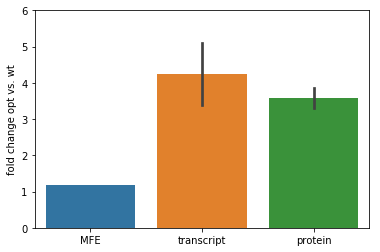

In [5]:
#select gene to plot. Allowed values for gene are 'ADE2','CDC10',GRX5','HIS3','NBP35',RAS2','SUP35'
gene = 'ADE2'

measurements, results = [],[]

measurements.append('MFE')
results.append(sec_result.loc[sec_result.Gene == gene].MFE_ratio.values[0])

qPCRs = qPCR_result.loc[qPCR_result.Clone == 'max' + gene]
for row in range(qPCRs.shape[0]):
    measurements.append('transcript')
    results.append(qPCRs.iloc[row].fold_change_wt)

blots = blot_result.loc[blot_result.Sample == gene]
for row in range(blots.shape[0]):
    measurements.append('protein')
    results.append(blots.iloc[row].protein_fold_change)
    
this_gene = pd.DataFrame({'Measurement':measurements,'Results':results})

ax = sns.barplot(x='Measurement',y='Results',data=this_gene,ci=68)
ax.set(xlabel='', ylabel='fold change opt vs. wt')
ax.set(ylim=(0,6))
plt.savefig(gene + '_barplot.svg')

plt.show()
